In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
lower_white = np.array([22, 122, 179])
upper_white = np.array([255, 255, 255])
# Define the polygon vertices
pts = np.array([[1315, 627], [1912, 634], [1908, 582], [1340, 325], [736, 278]], np.int32)
pts2 = np.array([[1287, 53], [1909, 232], [1909, 566], [1310, 299]], np.int32)
# Create a mask from the polygon
polygons = [[[1041, 469], [1068, 485], [1106, 301], [1071, 298]],
            [[808, 333], [839, 354], [848, 281], [821, 271]],
            [[1342, 315], [1384, 329], [1332, 649], [1281, 639]],
            [[1458, 354], [1497, 375], [1430, 647], [1392, 645]],
            [[1470, 281], [1515, 303], [1561, 101], [1512, 86]],
            [[1377, 50], [1349, 211], [1393, 255], [1426, 65]]]

mask = np.zeros((1080, 1920), np.uint8)
cv2.fillPoly(mask, [pts], 255)
cv2.fillPoly(mask, [pts2], 255)

image = cv2.imread("xalil.png")
for polygon in polygons:
    cv2.fillPoly(image, [np.array(polygon)], (255,255,255))
    
white_filtered = cv2.inRange(image,lower_white,upper_white)

#image_copy  = image.copy()
full_white = np.full_like(image, fill_value=(255,255,255))


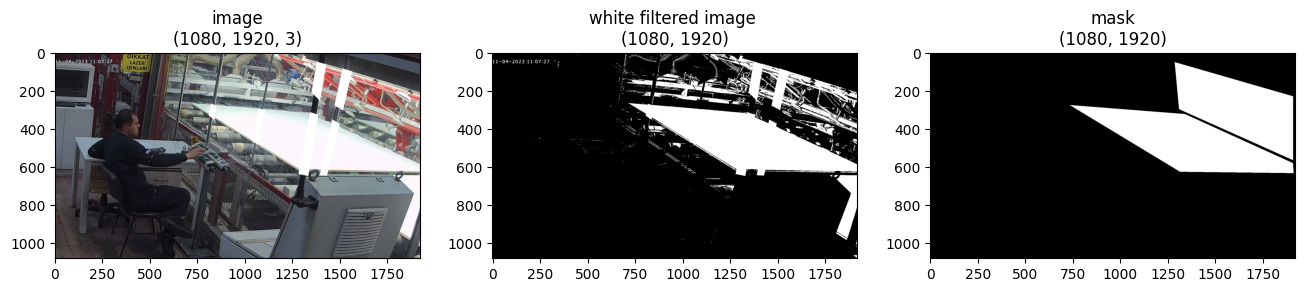

In [13]:
f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

plt.sca(axarr[0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.title(f"image\n" + str(image.shape))

plt.sca(axarr[1])
plt.imshow(cv2.cvtColor(white_filtered, cv2.COLOR_RGB2BGR))
plt.title(f"white filtered image \n" + str(white_filtered.shape))

plt.sca(axarr[2])
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
plt.title(f"mask\n" + str(mask.shape))



plt.show()


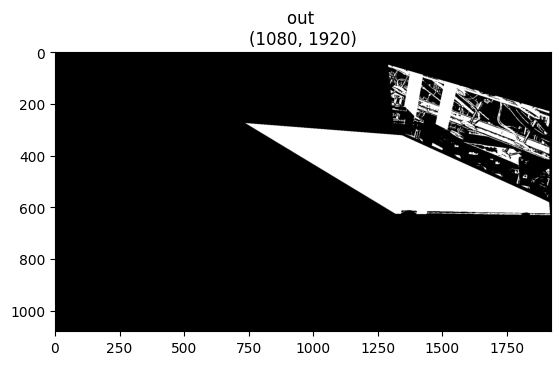

In [12]:
out = cv2.bitwise_and(white_filtered,mask)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
plt.title(f"out \n" + str(out.shape))
plt.show()


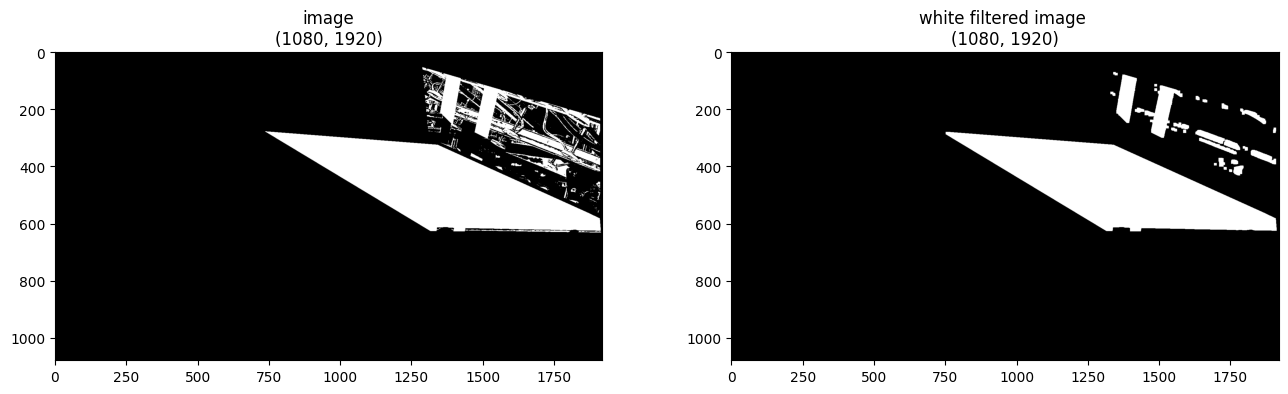

In [15]:


f, axarr = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

plt.sca(axarr[0])
plt.imshow(cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
plt.title(f"image\n" + str(out.shape))


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
masked_frame = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)

plt.sca(axarr[1])
plt.imshow(cv2.cvtColor(masked_frame, cv2.COLOR_RGB2BGR))
plt.title(f"white filtered image \n" + str(masked_frame.shape))



plt.show()
